In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# buy & hold

In [143]:
## 주식 전체 마켓캡, 날짜 수집
import pandas as pd
path = '/content/drive/MyDrive/0_Capstone/data/merged_trend/MKTCAP포함/'
file_names = [
    "new_KR7005930003_preprocessed.csv",
    "new_KR7000250001_preprocessed.csv",
    "new_KR7036570000_preprocessed.csv",
    "new_KR7051910008_preprocessed.csv",
    "new_KR7066700006_preprocessed.csv",
    "new_KR7066970005_preprocessed.csv",
    "new_KR7068760008_preprocessed.csv",
    "new_KR7078600004_preprocessed.csv",
    "new_KR7096770003_preprocessed.csv",
    "new_KR7128940004_preprocessed.csv",
    "new_KR7185750007_preprocessed.csv",
    "new_KR7192080000_preprocessed.csv",
    "new_KR7207940008_preprocessed.csv",
    "new_KR7225570001_preprocessed.csv",
    "new_KR7247540008_preprocessed.csv",
    "new_KR7251270005_preprocessed.csv",
    "new_KR7263750002_preprocessed.csv",
    "new_KR7293490009_preprocessed.csv",
    "new_KR7373220003_preprocessed.csv",
]


def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

data_list = []

for file_name in file_names:
    df = load_data(path + file_name)
    df['Date'] = pd.to_datetime(df['TRD_DD'])
    # Get the stock name from file_name (assuming format remains consistent)
    stock_name = file_name.split('_')[1].split('.')[0]

    # Append each row for the stock to the list
    for index, row in df.iterrows():
        data_list.append({'Stock': stock_name, 'Date': row['Date'], 'MKTCAP': row['MKTCAP']})

# Construct the DataFrame after appending data
total_stocks = pd.DataFrame(data_list)

display(total_stocks.head())
print(total_stocks['Stock'].unique())

,Stock,Date,MKTCAP
0,KR7005930003,1995-05-02,6497053077500
1,KR7005930003,1995-05-03,6714527657500
2,KR7005930003,1995-05-04,6660159012500
3,KR7005930003,1995-05-06,6632974690000
4,KR7005930003,1995-05-08,6578606045000


['KR7005930003' 'KR7000250001' 'KR7036570000' 'KR7051910008'
 'KR7066700006' 'KR7066970005' 'KR7068760008' 'KR7078600004'
 'KR7096770003' 'KR7128940004' 'KR7185750007' 'KR7192080000'
 'KR7207940008' 'KR7225570001' 'KR7247540008' 'KR7251270005'
 'KR7263750002' 'KR7293490009' 'KR7373220003']


In [144]:
total_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61916 entries, 0 to 61915
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Stock   61916 non-null  object        
 1   Date    61916 non-null  datetime64[ns]
 2   MKTCAP  61916 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ MB


In [145]:
total_stocks
total_stocks.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/total_stocks(Stock,DATE,MKTCAP).csv', index=False)

In [146]:
# 상대수익률 확인
ESN_rel = pd.read_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/ESN_relative_return.csv')
RNN_rel = pd.read_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/RNN_relative_return.csv')
Cls_rel = pd.read_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/Cls_relative_return.csv')

In [147]:
ESN_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stock            19 non-null     object 
 1   First Date       19 non-null     object 
 2   Last Date        19 non-null     object 
 3   stock_type       19 non-null     object 
 4   trade_days       19 non-null     float64
 5   market_return    19 non-null     float64
 6   stock_return     19 non-null     float64
 7   relative_return  19 non-null     float64
 8   diff_return      19 non-null     float64
dtypes: float64(5), object(4)
memory usage: 1.5+ KB


In [148]:
# Convert 'First Date' and 'Last Date' columns to datetime format in _rel DataFrames
ESN_rel['First Date'] = pd.to_datetime(ESN_rel['First Date'])
ESN_rel['Last Date'] = pd.to_datetime(ESN_rel['Last Date'])
RNN_rel['First Date'] = pd.to_datetime(RNN_rel['First Date'])
RNN_rel['Last Date'] = pd.to_datetime(RNN_rel['Last Date'])
Cls_rel['First Date'] = pd.to_datetime(Cls_rel['First Date'])
Cls_rel['Last Date'] = pd.to_datetime(Cls_rel['Last Date'])

# Create empty DataFrames to store the extracted data for each model
total_stocks_test_ESN = pd.DataFrame()
total_stocks_test_RNN = pd.DataFrame()
total_stocks_test_Cls = pd.DataFrame()

# Iterate through each stock in _rel DataFrames
for model_df, model_name in zip([ESN_rel, RNN_rel, Cls_rel], ['ESN', 'RNN', 'Cls']):
    for index, row in model_df.iterrows():
        # Extract date range for each stock from total_stocks DataFrame
        stock_data = total_stocks[
            (total_stocks['Stock'] == row['Stock']) &
            (total_stocks['Date'] >= row['First Date']) &
            (total_stocks['Date'] <= row['Last Date'])
        ]

        # Append the extracted data to respective total_stocks_test DataFrames
        if model_name == 'ESN':
            total_stocks_test_ESN = pd.concat([total_stocks_test_ESN, stock_data])
        elif model_name == 'RNN':
            total_stocks_test_RNN = pd.concat([total_stocks_test_RNN, stock_data])
        elif model_name == 'Cls':
            total_stocks_test_Cls = pd.concat([total_stocks_test_Cls, stock_data])

# Reset the indices of the new DataFrames
total_stocks_test_ESN.reset_index(drop=True, inplace=True)
total_stocks_test_RNN.reset_index(drop=True, inplace=True)
total_stocks_test_Cls.reset_index(drop=True, inplace=True)

# Displaying a sample of the extracted data for each model
print("Sample data for ESN model:")
display(total_stocks_test_ESN.head())

print("\nSample data for RNN model:")
display(total_stocks_test_RNN.head())

print("\nSample data for Cls model:")
display(total_stocks_test_Cls.head())

Sample data for ESN model:


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-23,171014530257000
1,KR7005930003,2014-09-24,169394237550000
2,KR7005930003,2014-09-25,170278033572000
3,KR7005930003,2014-09-26,174549714345000
4,KR7005930003,2014-09-29,176022707715000



Sample data for RNN model:


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-22,174991612356000
1,KR7005930003,2014-09-23,171014530257000
2,KR7005930003,2014-09-24,169394237550000
3,KR7005930003,2014-09-25,170278033572000
4,KR7005930003,2014-09-26,174549714345000



Sample data for Cls model:


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-23,171014530257000
1,KR7005930003,2014-09-24,169394237550000
2,KR7005930003,2014-09-25,170278033572000
3,KR7005930003,2014-09-26,174549714345000
4,KR7005930003,2014-09-29,176022707715000


In [149]:
# total_stocks_test_종류 별로 잘 추출되었는지 확인
# Function to compare extracted dates with First Date and Last Date columns
def compare_dates(extracted_df, rel_df, model_name):
    extracted_dates = extracted_df.groupby('Stock')['Date'].agg(['min', 'max'])
    rel_dates = rel_df.groupby('Stock')[['First Date', 'Last Date']].first()

    print(f"Comparison for {model_name} model:")
    comparison = pd.merge(extracted_dates, rel_dates, left_index=True, right_index=True)
    comparison['Date_match'] = (comparison['min'] == comparison['First Date']) & (comparison['max'] == comparison['Last Date'])
    print(comparison)

# # Compare the extracted dates with First Date and Last Date columns for each model
# compare_dates(total_stocks_test_ESN, ESN_rel, "ESN")
# compare_dates(total_stocks_test_RNN, RNN_rel, "RNN")
# compare_dates(total_stocks_test_Cls, Cls_rel, "Cls")


In [150]:
# 종목별 첫날, 마지막날 시총액
def extract_min_max_rows(df):
    min_max_rows = pd.DataFrame()
    for stock, (min_date, max_date) in df.groupby('Stock')['Date'].agg(['min', 'max']).iterrows():
        min_row = df[(df['Stock'] == stock) & (df['Date'] == min_date)]
        max_row = df[(df['Stock'] == stock) & (df['Date'] == max_date)]
        min_max_rows = pd.concat([min_max_rows, min_row, max_row])
    return min_max_rows

# Extract rows with minimum and maximum dates for each DataFrame
min_max_rows_ESN = extract_min_max_rows(total_stocks_test_ESN)
min_max_rows_RNN = extract_min_max_rows(total_stocks_test_RNN)
min_max_rows_Cls = extract_min_max_rows(total_stocks_test_Cls)

# Display the extracted rows for each DataFrame
print("Rows containing minimum and maximum dates for total_stocks_test_ESN:")
print(min_max_rows_ESN)
print("\nRows containing minimum and maximum dates for total_stocks_test_RNN:")
print(min_max_rows_RNN)
print("\nRows containing minimum and maximum dates for total_stocks_test_Cls:")
print(min_max_rows_Cls)

Rows containing minimum and maximum dates for total_stocks_test_ESN:
              Stock       Date           MKTCAP
2127   KR7000250001 2016-07-22     214491682800
3801   KR7000250001 2023-05-12    1427834548600
0      KR7005930003 2014-09-23  171014530257000
2126   KR7005930003 2023-05-12  382663061455000
3802   KR7036570000 2016-06-29    4955958972000
5493   KR7036570000 2023-05-12    8331551349000
5494   KR7051910008 2016-09-22   15805657350000
7128   KR7051910008 2023-05-12   48567531984000
7129   KR7066700006 2017-08-22     161792597280
8536   KR7066700006 2023-05-12     174062971600
8537   KR7066970005 2017-03-22     371184972800
10047  KR7066970005 2023-05-12    8626386682000
10048  KR7068760008 2018-03-06    2942168279400
11327  KR7068760008 2023-05-12    3230415643200
11328  KR7078600004 2017-10-27     122666826750
12693  KR7078600004 2023-05-12    1371580539800
12694  KR7096770003 2018-08-13   17799621070000
13864  KR7096770003 2023-05-12   16375651384400
13865  KR7128940004

In [151]:
type(min_max_rows_ESN)

pandas.core.frame.DataFrame

사서 안 팔고 가지고 있었을 때

## 사서 안팔고 가지고 있었을때 전체

In [152]:
display(total_stocks_test_ESN.head())
display(total_stocks_test_RNN.head())
display(total_stocks_test_Cls.head())

,Stock,Date,MKTCAP
0,KR7005930003,2014-09-23,171014530257000
1,KR7005930003,2014-09-24,169394237550000
2,KR7005930003,2014-09-25,170278033572000
3,KR7005930003,2014-09-26,174549714345000
4,KR7005930003,2014-09-29,176022707715000


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-22,174991612356000
1,KR7005930003,2014-09-23,171014530257000
2,KR7005930003,2014-09-24,169394237550000
3,KR7005930003,2014-09-25,170278033572000
4,KR7005930003,2014-09-26,174549714345000


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-23,171014530257000
1,KR7005930003,2014-09-24,169394237550000
2,KR7005930003,2014-09-25,170278033572000
3,KR7005930003,2014-09-26,174549714345000
4,KR7005930003,2014-09-29,176022707715000


In [153]:
def calculate_return(df_test, min_date, max_date):
    first = df_test.loc[df_test['Date'] == min_date, 'MKTCAP'].values[0]
    last = df_test.loc[df_test['Date'] == max_date, 'MKTCAP'].values[0]

    initial_capital = 10000000000000000
    shares_held = 0
    capital = initial_capital

    shares_to_buy = capital // first
    shares_held += shares_to_buy
    capital -= shares_to_buy * first

    capital += shares_held * last
    shares_held = 0

    returns = (capital - initial_capital) / initial_capital * 100

    return returns

# Calculate return for each stock in total_stocks_test_ESN, total_stocks_test_RNN, total_stocks_test_Cls
# for model_name, df in zip(['ESN', 'RNN', 'Cls'], [total_stocks_test_ESN, total_stocks_test_RNN, total_stocks_test_Cls]): ## 기존 수익률이랑 일치하는지 확인 실험
#     print(f"Returns for {model_name} model:")
#     stock_dates = df.groupby('Stock')['Date'].agg(['min', 'max'])
#     for stock, dates in stock_dates.iterrows():
#         min_date = dates['min']
#         max_date = dates['max']

#         returns = calculate_return(df[df['Stock'] == stock], min_date, max_date)
#         print(f"{stock}, Returns: {returns:.2f}%")


In [154]:
## Buy & Hold 수익률 컬럼 추가
ESN_rel1 = ESN_rel.copy()
RNN_rel1 = RNN_rel.copy()
Cls_rel1 = Cls_rel.copy()

ESN_rel1['buy&hold return'] = ESN_rel1.apply(lambda row: calculate_return(total_stocks_test_ESN[total_stocks_test_ESN['Stock'] == row['Stock']], row['First Date'], row['Last Date']), axis=1)
RNN_rel1['buy&hold return'] = RNN_rel1.apply(lambda row: calculate_return(total_stocks_test_RNN[total_stocks_test_RNN['Stock'] == row['Stock']], row['First Date'], row['Last Date']), axis=1)
Cls_rel1['buy&hold return'] = Cls_rel1.apply(lambda row: calculate_return(total_stocks_test_Cls[total_stocks_test_Cls['Stock'] == row['Stock']], row['First Date'], row['Last Date']), axis=1)

# display(ESN_rel1.head())
# display(RNN_rel1.head())
# display(Cls_rel1.head())

### Buy&hold의 relative도 계산필요

In [155]:
#### 상대적 수익률(코스피,코스닥과 비교한 수익률) 함수
def calculate_relative_return(portfolio_return, benchmark_return):
    relative_return = ((portfolio_return - benchmark_return) / benchmark_return) * 100
    return relative_return

In [156]:
#buy&hold의 상대적 수익률 계산
for df_name in [ESN_rel1, RNN_rel1, Cls_rel1]:
    for stock, group in df_name.groupby('Stock'):
        portfolio_return = group['buy&hold return'].values[0] #buy&hold 수익률
        benchmark_return = group['market_return'].values[0] #마켓지표 수익률
        relative_return = calculate_relative_return(portfolio_return, benchmark_return)
        df_name.loc[df_name['Stock'] == stock, 'relative_B&H_return'] = relative_return
        # original_return = group['buy&hold return'].values[0]
        # df_name.loc[df_name['Stock'] == stock, 'diff_return'] = -1*(original_return - relative_return) ## 기존 수익 대비 상대적 수익률 추이
display(ESN_rel1.head())
display(RNN_rel1.head())
display(Cls_rel1.head())

,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return,relative_B&H_return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,202.001637,227.124812,25.123176,122.756148,98.793349
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,706.657117,759.371608,52.714491,565.672577,587.919135
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,109.123937,88.212257,-20.911679,68.085698,17.431275
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,492.117707,886.778735,394.661028,207.055048,315.180180
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,369.809833,365.822436,-3.987397,7.583950,-90.447052


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return,relative_B&H_return
0,KR7005930003,2014-09-22,2023-05-12,kospi,3154.0,60.931598,130.102394,113.522046,-16.580348,118.372726,94.271495
1,KR7000250001,2016-07-21,2023-05-12,kosdaq,2486.0,82.114102,266.083534,224.041213,-42.042321,555.890598,576.973360
2,KR7036570000,2016-06-28,2023-05-12,kospi,2509.0,59.590739,162.367401,172.470863,10.103462,69.585816,16.772869
3,KR7051910008,2016-09-21,2023-05-12,kospi,2424.0,50.946688,225.720789,343.052920,117.332131,204.052192,300.521016
4,KR7066700006,2017-08-21,2023-05-12,kosdaq,2090.0,80.540589,14.639337,-81.823653,-96.462990,7.583950,-90.583692


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,model_type,relative_return,diff_return,buy&hold return,relative_B&H_return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,1631.500385,GBT,2542.078876,910.578491,122.756148,98.793349
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,89.262823,NaiveBayes,8.553263,-80.709560,565.672577,587.919135
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,110.540721,SVM,90.655866,-19.884855,68.085698,17.431275
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,144.614521,GBT,189.976427,45.361906,207.055048,315.180180
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,183.014166,DecisionTree,130.529579,-52.484588,7.583950,-90.447052


### 가장 적합한 수익률 방식 표시 'Highest_return'

In [157]:
## 가장 적합한 수익률 방식 표시 컬럼 'Highest_return'
ESN_rel1['Highest_return'] = ESN_rel1.apply(lambda row: ('relative', row['relative_return']) if row['relative_return'] > row['relative_B&H_return'] else ('buy&hold', row['relative_B&H_return']), axis=1)
RNN_rel1['Highest_return'] = RNN_rel1.apply(lambda row: ('relative', row['relative_return']) if row['relative_return'] > row['relative_B&H_return'] else ('buy&hold', row['relative_B&H_return']), axis=1)
Cls_rel1['Highest_return'] = Cls_rel1.apply(lambda row: ('relative', row['relative_return']) if row['relative_return'] > row['relative_B&H_return'] else ('buy&hold', row['relative_B&H_return']), axis=1)

display(ESN_rel1.head())
display(RNN_rel1.head())
display(Cls_rel1.head())

,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return,relative_B&H_return,Highest_return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,202.001637,227.124812,25.123176,122.756148,98.793349,"(relative, 227.12481221320817)"
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,706.657117,759.371608,52.714491,565.672577,587.919135,"(relative, 759.3716083783053)"
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,109.123937,88.212257,-20.911679,68.085698,17.431275,"(relative, 88.21225736514678)"
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,492.117707,886.778735,394.661028,207.055048,315.180180,"(relative, 886.7787350977766)"
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,369.809833,365.822436,-3.987397,7.583950,-90.447052,"(relative, 365.8224360233299)"


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return,relative_B&H_return,Highest_return
0,KR7005930003,2014-09-22,2023-05-12,kospi,3154.0,60.931598,130.102394,113.522046,-16.580348,118.372726,94.271495,"(relative, 113.52204629494706)"
1,KR7000250001,2016-07-21,2023-05-12,kosdaq,2486.0,82.114102,266.083534,224.041213,-42.042321,555.890598,576.973360,"(buy&hold, 576.9733598117734)"
2,KR7036570000,2016-06-28,2023-05-12,kospi,2509.0,59.590739,162.367401,172.470863,10.103462,69.585816,16.772869,"(relative, 172.4708626189579)"
3,KR7051910008,2016-09-21,2023-05-12,kospi,2424.0,50.946688,225.720789,343.052920,117.332131,204.052192,300.521016,"(relative, 343.0529202322374)"
4,KR7066700006,2017-08-21,2023-05-12,kosdaq,2090.0,80.540589,14.639337,-81.823653,-96.462990,7.583950,-90.583692,"(relative, -81.8236530841116)"


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,model_type,relative_return,diff_return,buy&hold return,relative_B&H_return,Highest_return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,1631.500385,GBT,2542.078876,910.578491,122.756148,98.793349,"(relative, 2542.0788760872847)"
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,89.262823,NaiveBayes,8.553263,-80.709560,565.672577,587.919135,"(buy&hold, 587.9191346493321)"
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,110.540721,SVM,90.655866,-19.884855,68.085698,17.431275,"(relative, 90.65586561763068)"
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,144.614521,GBT,189.976427,45.361906,207.055048,315.180180,"(buy&hold, 315.1801799619929)"
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,183.014166,DecisionTree,130.529579,-52.484588,7.583950,-90.447052,"(relative, 130.52957860795183)"


## 최종 buy&hold

In [158]:
ESN_rel1.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/ESN_return_FINAL+(stock,relative,buy&hold,relative_Buy&Hold).csv', index=False)
RNN_rel1.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/RNN_return_FINAL+(stock,relative,buy&hold,relative_Buy&Hold).csv', index=False)
Cls_rel1.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/Cls_return_FINAL+(stock,relative,buy&hold,relative_Buy&Hold).csv', index=False)


## relative buy&hold VS relative 결과

In [197]:
esn_counts = ESN_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()
rnn_counts = RNN_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()
cls_counts = Cls_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()

print("Counts for ESN_rel1:")
print(esn_counts)
print("\nCounts for RNN_rel1:")
print(rnn_counts)
print("\nCounts for Cls_rel1:")
print(cls_counts)

Counts for ESN_rel1:
relative    13
buy&hold     6
Name: Highest_return, dtype: int64

Counts for RNN_rel1:
relative    11
buy&hold     8
Name: Highest_return, dtype: int64

Counts for Cls_rel1:
buy&hold    11
relative     8
Name: Highest_return, dtype: int64


In [201]:
import pandas as pd

# 데이터 프레임들을 딕셔너리에 저장
dataframes = {'ESN': ESN_rel1, 'RNN': RNN_rel1, 'Cls': Cls_rel1}

# 데이터프레임 별로 계산
for name, df in dataframes.items():
    print(f"Dataframe {name}의 결과:") #딕셔너리에 저장해야 이름 출력가능. 그외에는 단순 리스트에 저장하면 됨.
    for col in ['stock_return', 'relative_return', 'relative_B&H_return']:
        col_data = df[col]  # 열 선택
        print(f"{col}의 평균: {col_data.mean()}")
        print(f"{col}의 최소값: {col_data.min()}")
        print(f"{col}의 최대값: {col_data.max()}")
    print('\n')

Dataframe ESN의 결과:
stock_return의 평균: 334.4003553387231
stock_return의 최소값: 5.94497396583
stock_return의 최대값: 1659.3936090811649
relative_return의 평균: 32315.749041690582
relative_return의 최소값: -478.6076113858849
relative_return의 최대값: 511561.59384350287
relative_B&H_return의 평균: 11296.13643010942
relative_B&H_return의 최소값: -277.49581004736643
relative_B&H_return의 최대값: 171365.165134511


Dataframe RNN의 결과:
stock_return의 평균: 174.95958381208044
stock_return의 최소값: 0.0
stock_return의 최대값: 964.40158204664
relative_return의 평균: 444.8280030237179
relative_return의 최소값: -1817.1220512700809
relative_return의 최대값: 6715.115289453976
relative_B&H_return의 평균: 319.7665016656227
relative_B&H_return의 최소값: -12931.684025842278
relative_B&H_return의 최대값: 14380.683973962177


Dataframe Cls의 결과:
stock_return의 평균: 199.2026481268131
stock_return의 최소값: -16.84180159528
stock_return의 최대값: 1631.500385160541
relative_return의 평균: 5795.006089101677
relative_return의 최소값: -489.6110013501126
relative_return의 최대값: 93679.78802490896


#### 결과 시각화

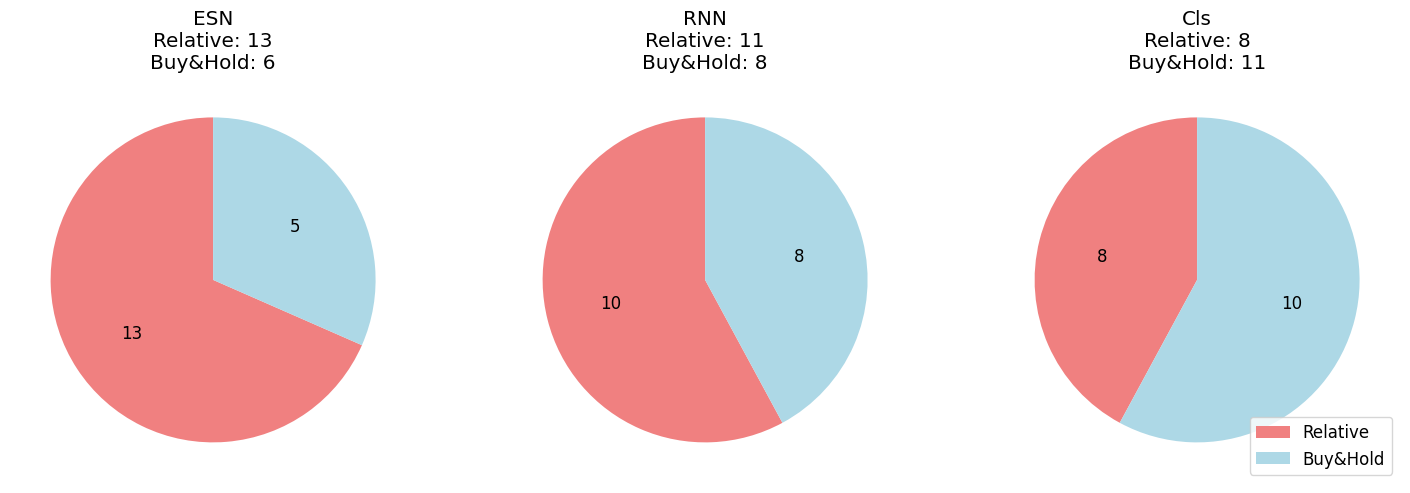

In [254]:
import matplotlib.pyplot as plt

# 데이터셋에서 값 가져오기
esn_counts = ESN_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()
rnn_counts = RNN_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()
cls_counts = Cls_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()

#색 설정
colors = ['lightcoral','lightblue']

# 각 데이터셋에서 'relative'과 'buy&hold' 카운트 가져오기
esn_relative = esn_counts.get('relative', 0)
esn_buy_hold = esn_counts.get('buy&hold', 0)

rnn_relative = rnn_counts.get('relative', 0)
rnn_buy_hold = rnn_counts.get('buy&hold', 0)

cls_relative = cls_counts.get('relative', 0)
cls_buy_hold = cls_counts.get('buy&hold', 0)

# 개수 그래프 그리기
labels = ['Relative', 'Buy&Hold']
counts = [esn_relative, esn_buy_hold, rnn_relative, rnn_buy_hold, cls_relative, cls_buy_hold]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(counts[:2], labels = None, autopct=lambda p: f'{int(p * sum(counts[:2]) / 100)}', startangle=90, colors=colors)
axs[0].set_title(f'ESN\nRelative: {esn_relative}\nBuy&Hold: {esn_buy_hold}')

axs[1].pie(counts[2:4], labels = None, autopct=lambda p: f'{int(p * sum(counts[2:4]) / 100)}', startangle=90, colors=colors)
axs[1].set_title(f'RNN\nRelative: {rnn_relative}\nBuy&Hold: {rnn_buy_hold}')

axs[2].pie(counts[4:], labels = None, autopct=lambda p: f'{int(p * sum(counts[4:]) / 100)}', startangle=90, colors=colors)
axs[2].set_title(f'Cls\nRelative: {cls_relative}\nBuy&Hold: {cls_buy_hold}')

#범례추가
axs[2].legend(labels, loc='lower right')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()


In [214]:
# display(ESN_rel1)
# display(RNN_rel1)
# display(Cls_rel1)

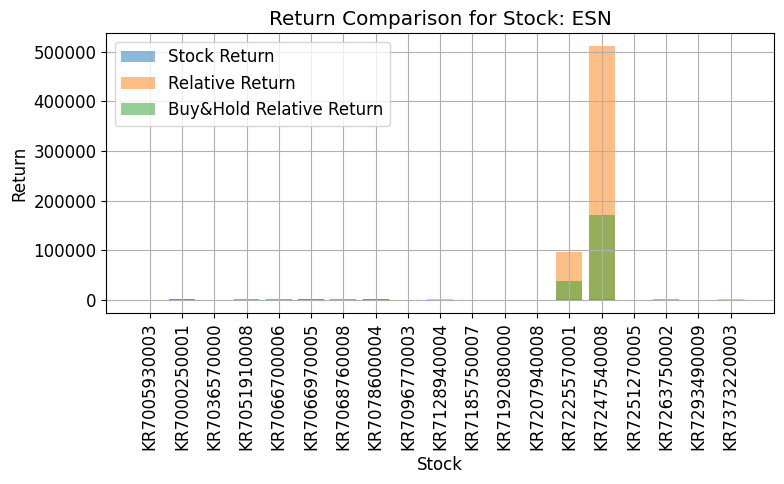

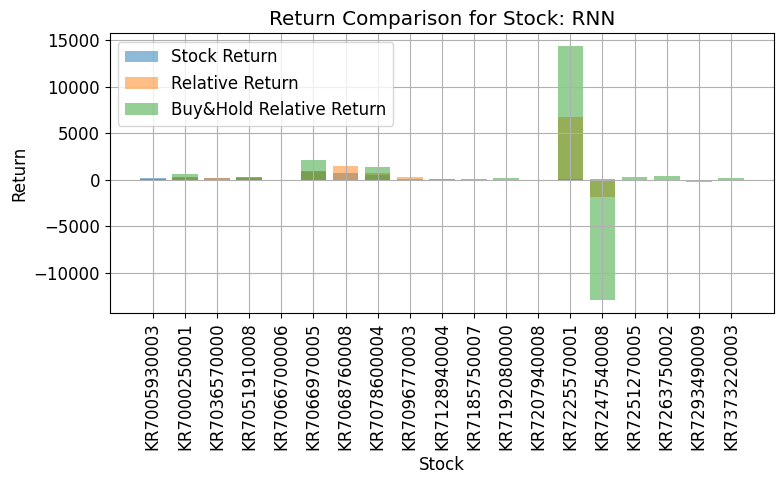

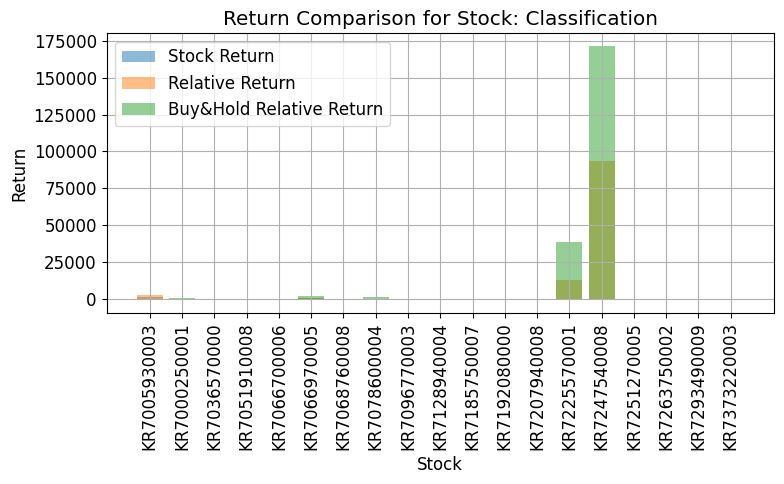

In [215]:
import matplotlib.pyplot as plt

# 데이터프레임들을 리스트로 저장
dataframes = [ESN_rel1, RNN_rel1, Cls_rel1]  # 각 데이터프레임을 여기에 넣어주세요
names = ['ESN', 'RNN', 'Classification']  # 각 데이터프레임에 해당하는 종목명

# 각 데이터프레임에 대해 그래프 그리기
for idx, (df, name) in enumerate(zip(dataframes, names), start=1):
    # 그래프 설정
    plt.figure(figsize=(8, 5))

    # 종목명을 X 축으로 설정하여 바 그래프 겹쳐 그리기
    plt.bar(df.index, df['stock_return'], label='Stock Return', alpha=0.5)
    plt.bar(df.index, df['relative_return'], label='Relative Return', alpha=0.5)
    plt.bar(df.index, df['relative_B&H_return'], label='Buy&Hold Relative Return', alpha=0.5)

    plt.xlabel('Stock')
    plt.ylabel('Return')
    plt.title(f'Return Comparison for Stock: {name}')
    plt.xticks(df.index, df['Stock'], rotation=90)  # X 축 라벨 설정
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # # 각 종목별로 그래프 저장
    # plt.savefig(f'Stock_{idx}_return_comparison.png')
    # plt.show()

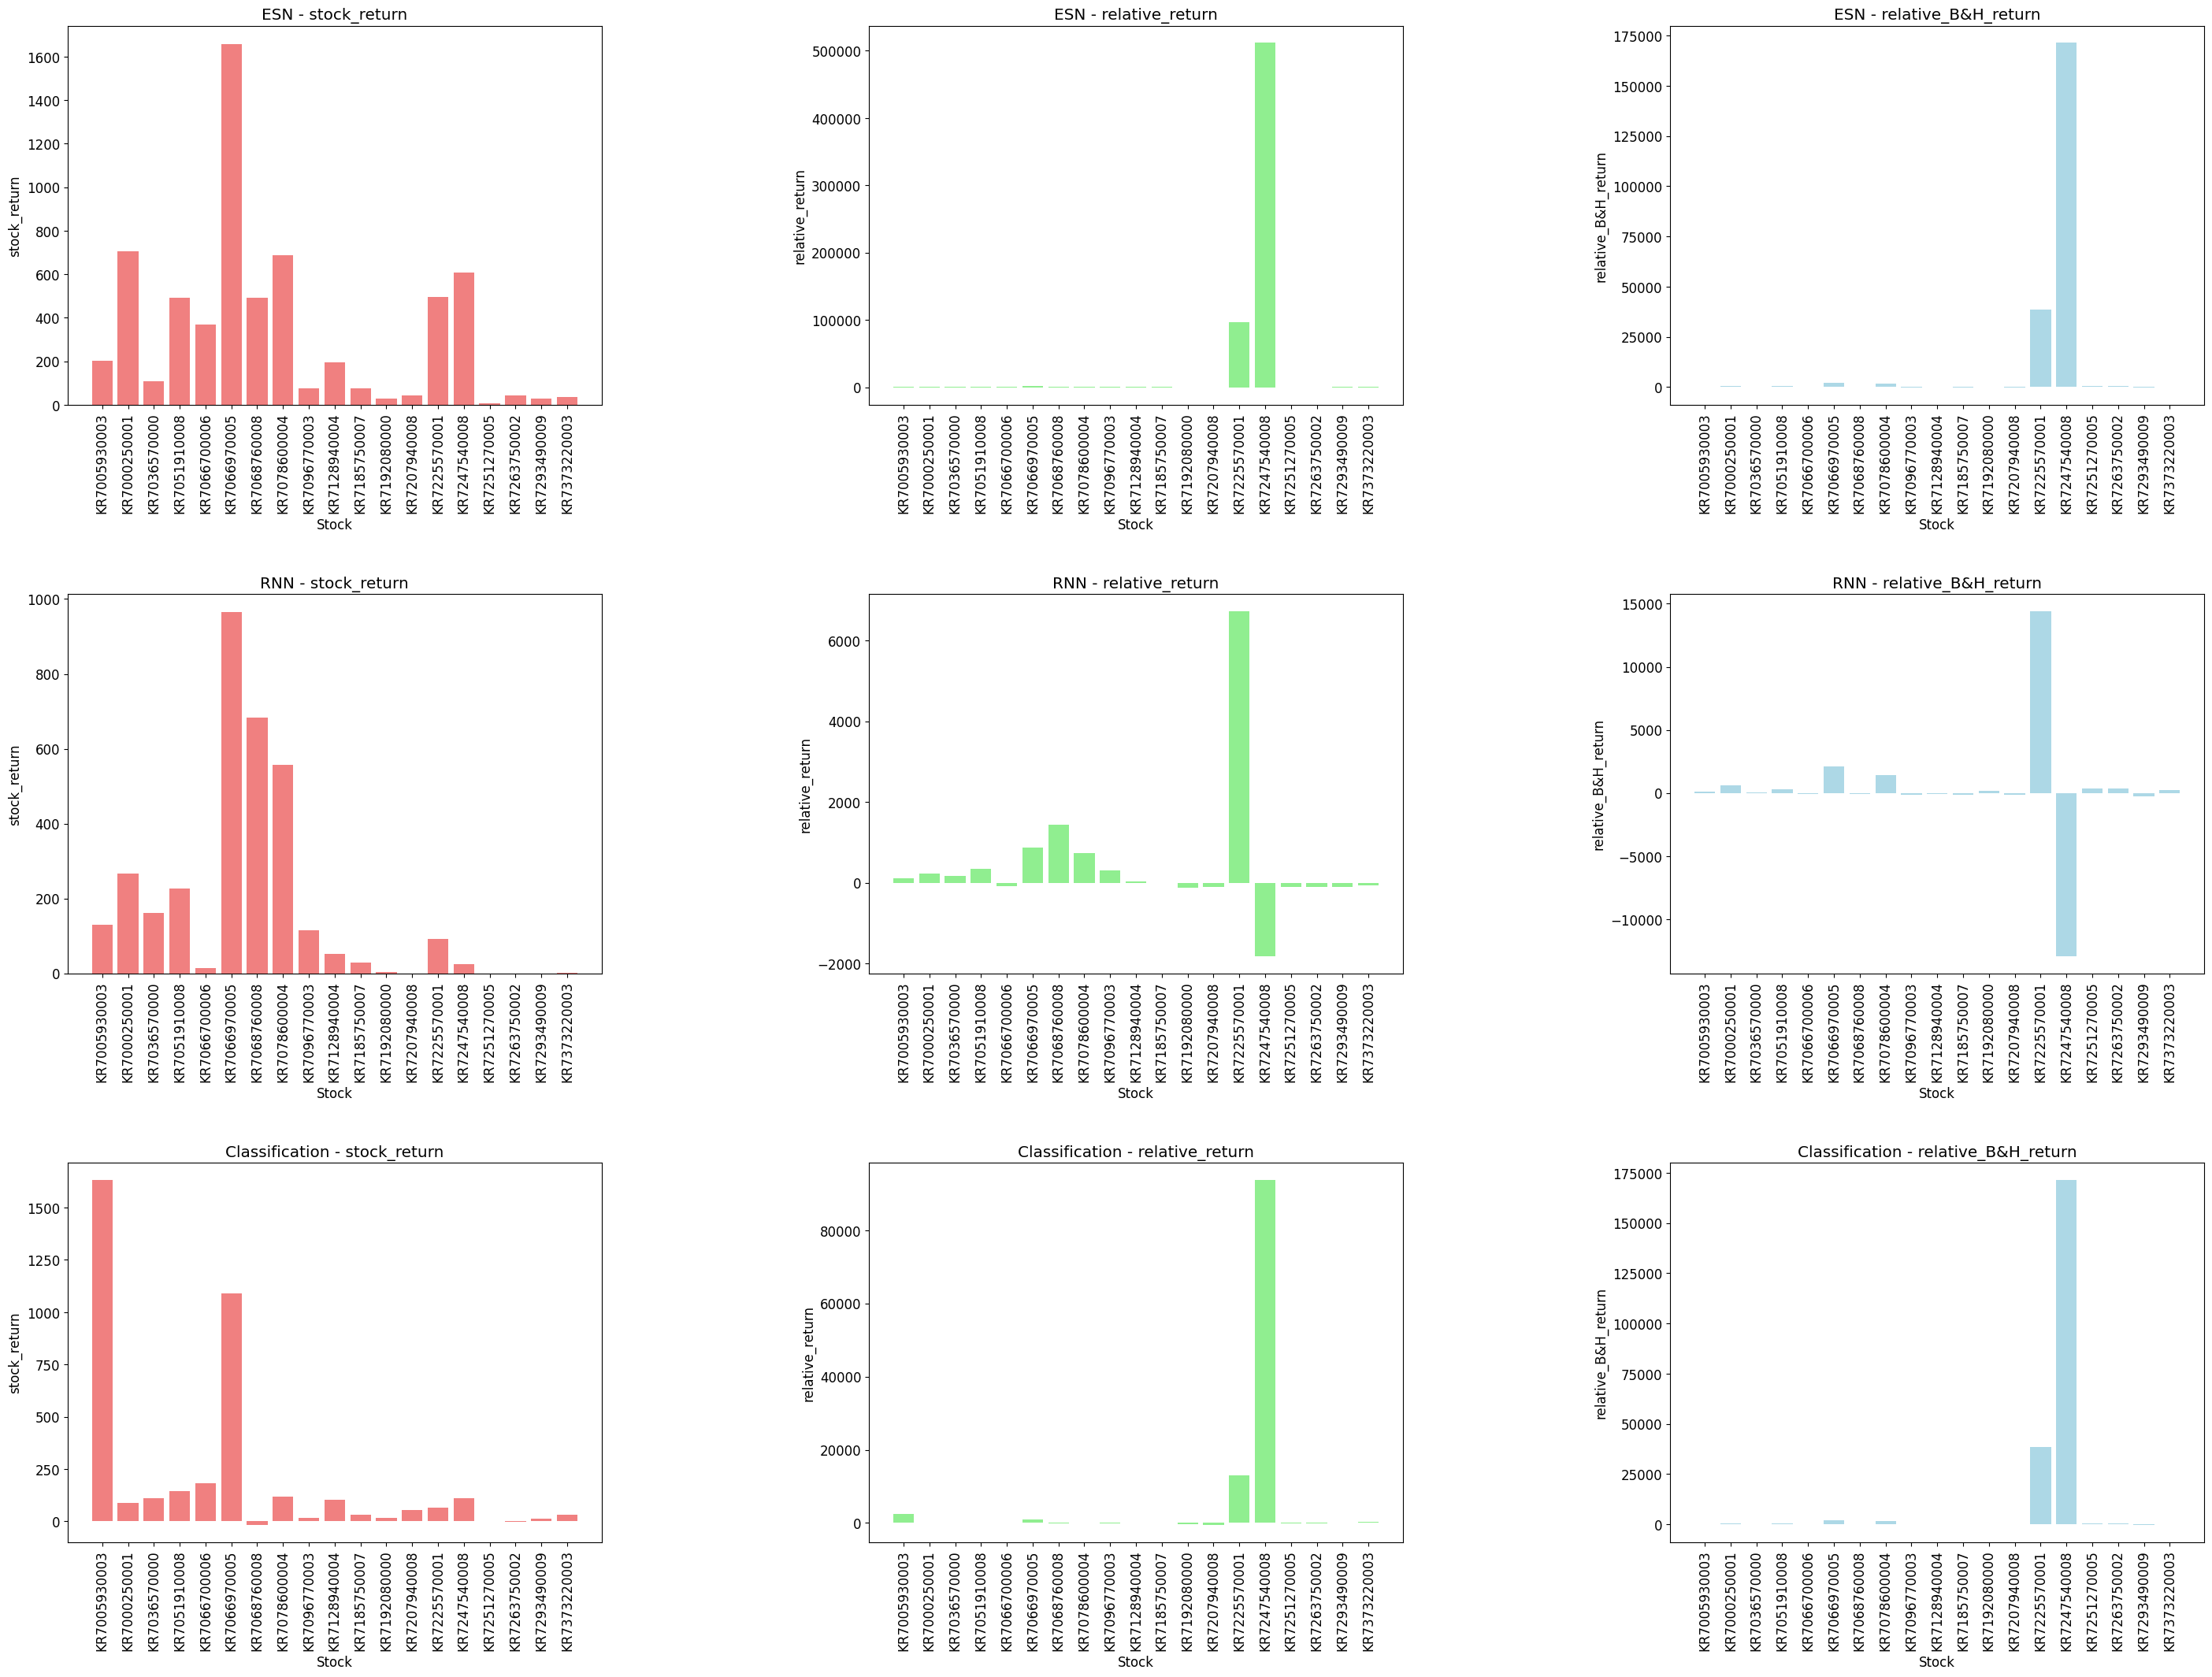

In [216]:
import matplotlib.pyplot as plt

# 데이터프레임과 열 지정
dataframes = [ESN_rel1, RNN_rel1, Cls_rel1]
columns = ['stock_return', 'relative_return', 'relative_B&H_return']
titles = ['ESN', 'RNN', 'Classification']
colors = ['lightcoral', 'lightgreen', 'lightblue']

# 3x3 서브플롯 생성
fig, axes = plt.subplots(3, 3, figsize=(35, 25))  # 크기 조정

# 각 데이터프레임에 대해 그래프 그리기
for i, df in enumerate(dataframes):
    for j, col in enumerate(columns):
        ax = axes[i, j]
        ax.bar(df['Stock'], df[col], color=colors[j])
        ax.set_title(f'{titles[i]} - {col}')
        ax.set_xlabel('Stock')
        ax.set_ylabel(col)
        ax.tick_params(axis='x', labelrotation=90)  # x축 레이블 회전

# 서브플롯 간 간격 조정
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 출력
plt.show()


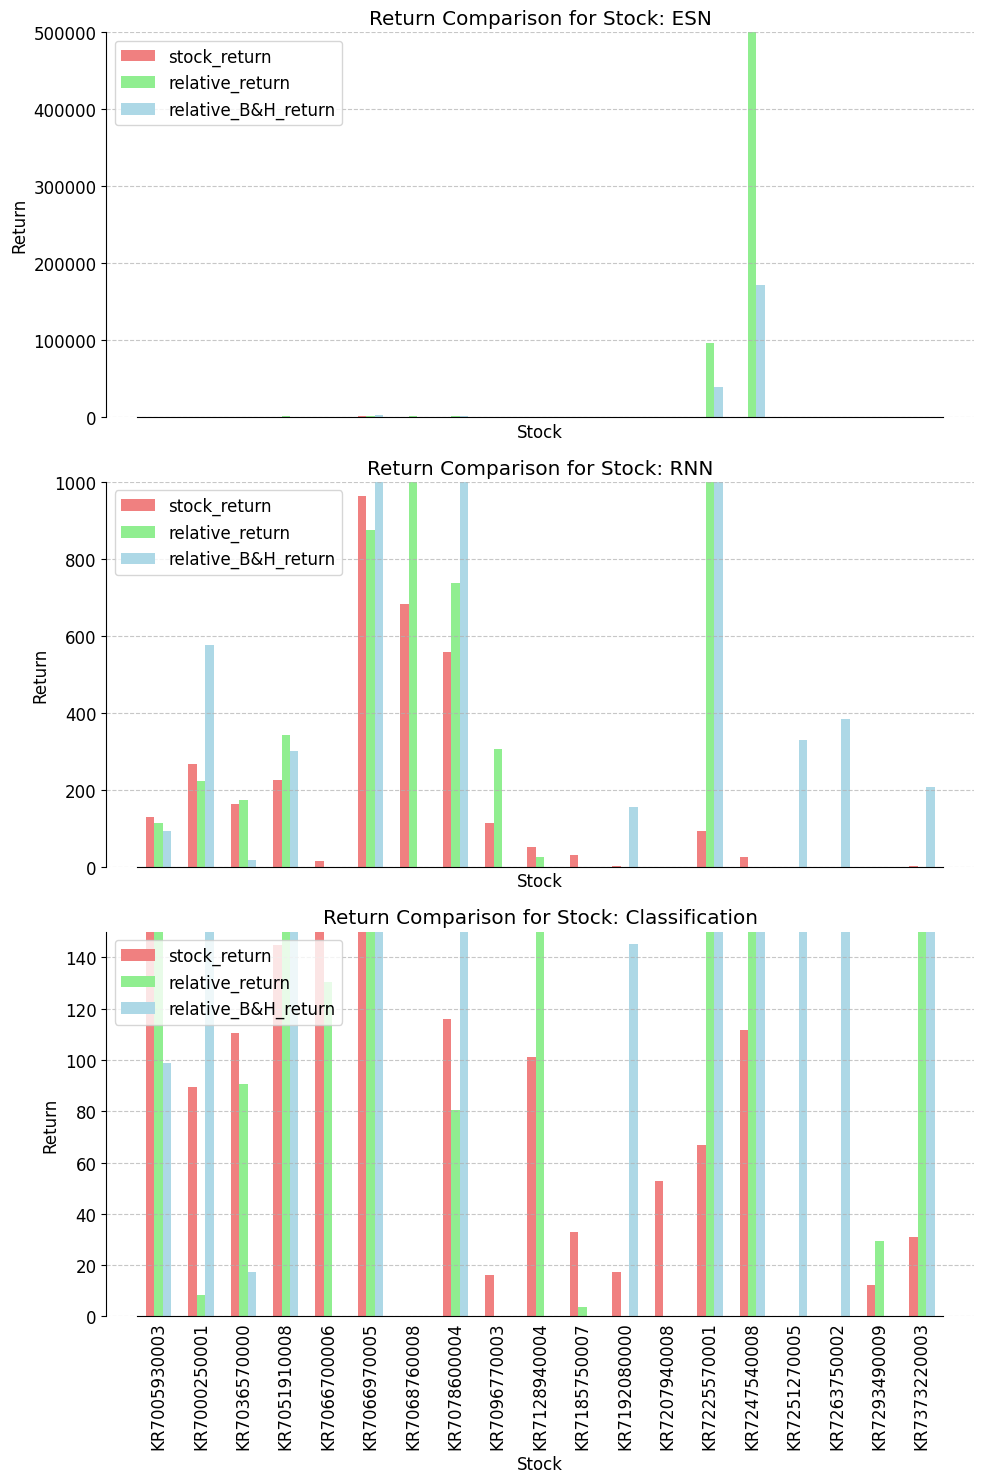

In [227]:

import matplotlib.pyplot as plt
import numpy as np

dataframes = [ESN_rel1, RNN_rel1, Cls_rel1]
names = ['ESN', 'RNN', 'Classification']
colors = ['lightcoral', 'lightgreen', 'lightblue']
columns = ['stock_return', 'relative_return', 'relative_B&H_return']

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for idx, (df, name) in enumerate(zip(dataframes, names), start=0):
    x = np.arange(len(df['Stock']))  # 종목 개수에 해당하는 x 값 생성
    width = 0.2  # 각 바의 너비

    for i, column in enumerate(columns):
        axs[idx].bar(x + (i - 1) * width, df[column], color=colors[i], width=width, label=column)

    axs[idx].set_xlabel('Stock')
    axs[idx].set_ylabel('Return')
    axs[idx].set_title(f'Return Comparison for Stock: {name}')
    axs[idx].set_xticks(x)
    axs[idx].set_xticklabels(df['Stock'], rotation=90)
    axs[idx].legend(loc='upper left')

    # 각 데이터프레임에 따라서 y축 범위 설정
    if idx == 0:
        axs[idx].set_ylim(0, 500000)
    elif idx == 1:
        axs[idx].set_ylim(0, 1000)
    elif idx == 2:
        axs[idx].set_ylim(0, 150)

    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)
    axs[idx].spines['left'].set_bounds(0, axs[idx].get_ylim()[1])
    axs[idx].spines['bottom'].set_bounds(-0.5, len(df['Stock']) - 0.5)
    axs[idx].tick_params(axis='x', which='both', length=0)
    axs[idx].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

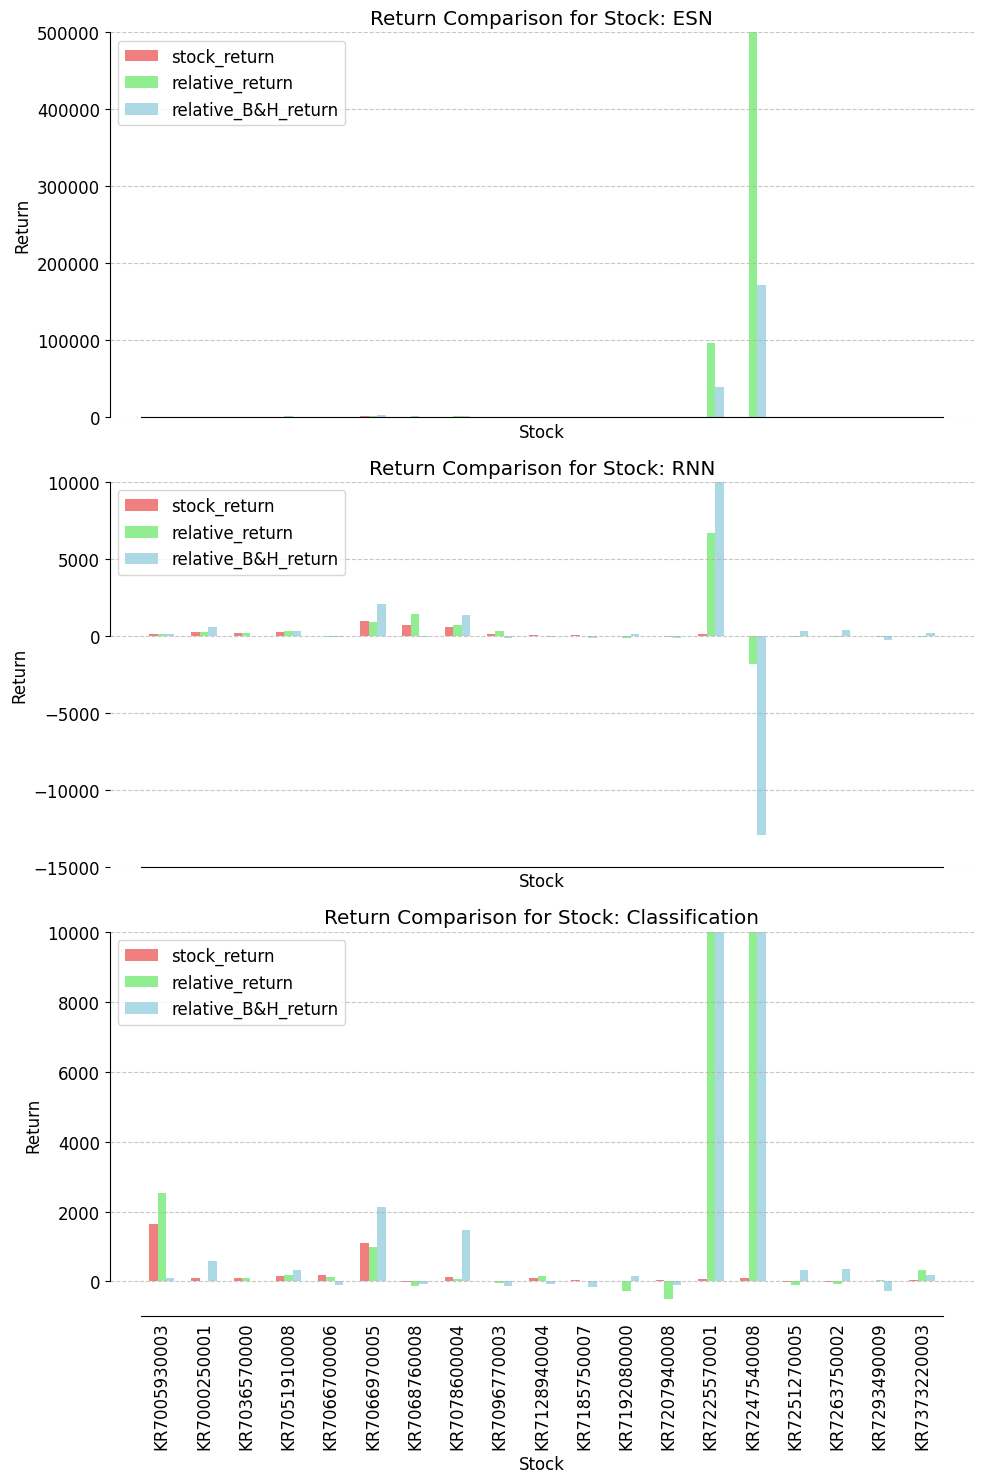

In [232]:

import matplotlib.pyplot as plt
import numpy as np

dataframes = [ESN_rel1, RNN_rel1, Cls_rel1]
names = ['ESN', 'RNN', 'Classification']
colors = ['lightcoral', 'lightgreen', 'lightblue']
columns = ['stock_return', 'relative_return', 'relative_B&H_return']

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for idx, (df, name) in enumerate(zip(dataframes, names), start=0):
    x = np.arange(len(df['Stock']))  # 종목 개수에 해당하는 x 값 생성
    width = 0.2  # 각 바의 너비

    for i, column in enumerate(columns):
        axs[idx].bar(x + (i - 1) * width, df[column], color=colors[i], width=width, label=column)

    axs[idx].set_xlabel('Stock')
    axs[idx].set_ylabel('Return')
    axs[idx].set_title(f'Return Comparison for Stock: {name}')
    axs[idx].set_xticks(x)
    axs[idx].set_xticklabels(df['Stock'], rotation=90)
    axs[idx].legend(loc = 'upper left')

    # 각 데이터프레임에 따라서 y축 범위 설정
    if idx == 0:
        axs[idx].set_ylim(0, 500000)
    elif idx == 1:
        axs[idx].set_ylim(-15000, 10000)
    elif idx == 2:
        axs[idx].set_ylim(-1000, 10000)

    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)
    axs[idx].spines['left'].set_bounds(0, axs[idx].get_ylim()[1])
    axs[idx].spines['bottom'].set_bounds(-0.5, len(df['Stock']) - 0.5)
    axs[idx].tick_params(axis='x', which='both', length=0)
    axs[idx].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [228]:
# import matplotlib.pyplot as plt

# # 데이터프레임과 열 지정
# dataframes = [ESN_rel1, RNN_rel1, Cls_rel1]
# columns = ['stock_return', 'relative_return', 'buy&hold return']
# titles = ['ESN', 'RNN', 'Classification']
# colors = ['lightcoral', 'lightgreen', 'lightblue']

# # 각 데이터프레임에 대해 그래프를 개별 창에 출력
# for i, df in enumerate(dataframes):
#     for j, col in enumerate(columns):
#         plt.figure(figsize=(8, 6))  # 개별 창 크기 조정
#         plt.bar(df['Stock'], df[col], color=colors[j])
#         plt.title(f'{titles[i]} - {col}')
#         plt.xlabel('Stock')
#         plt.ylabel(col)
#         plt.xticks(rotation=90)  # x축 레이블 회전
#         plt.tight_layout()
#         plt.show()


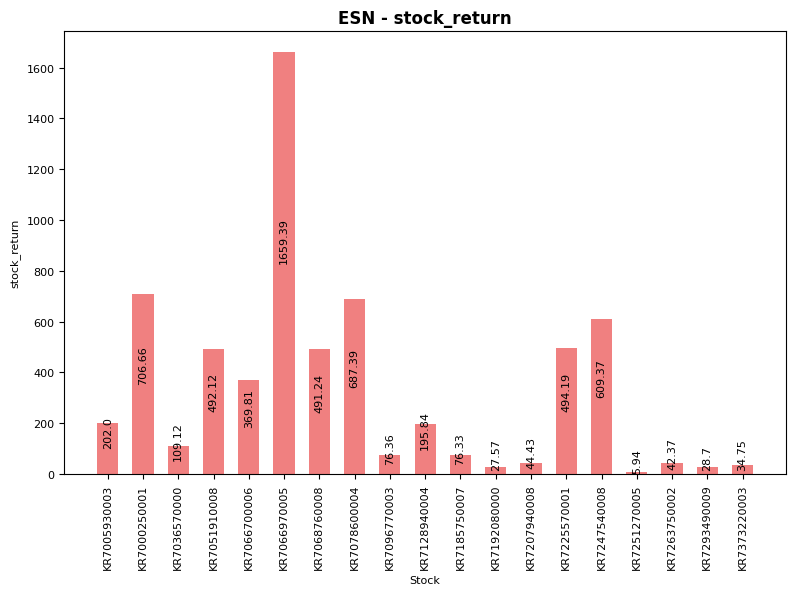

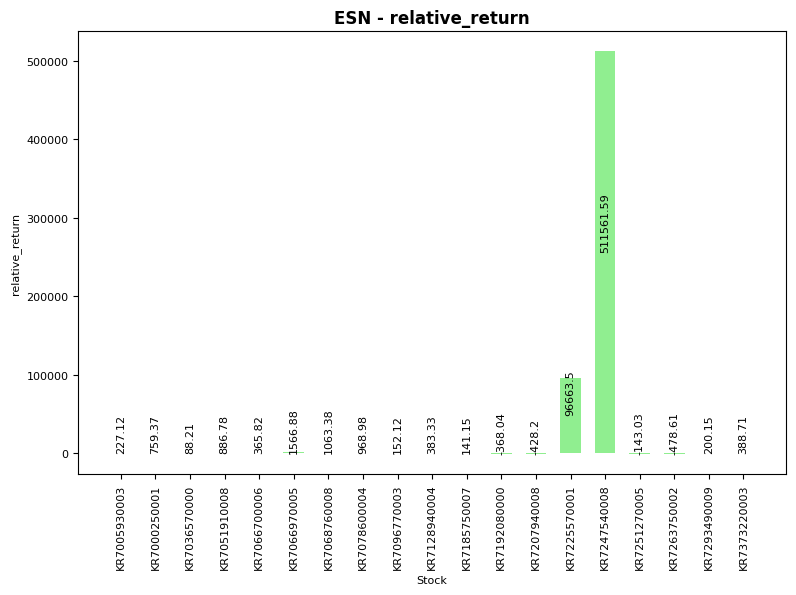

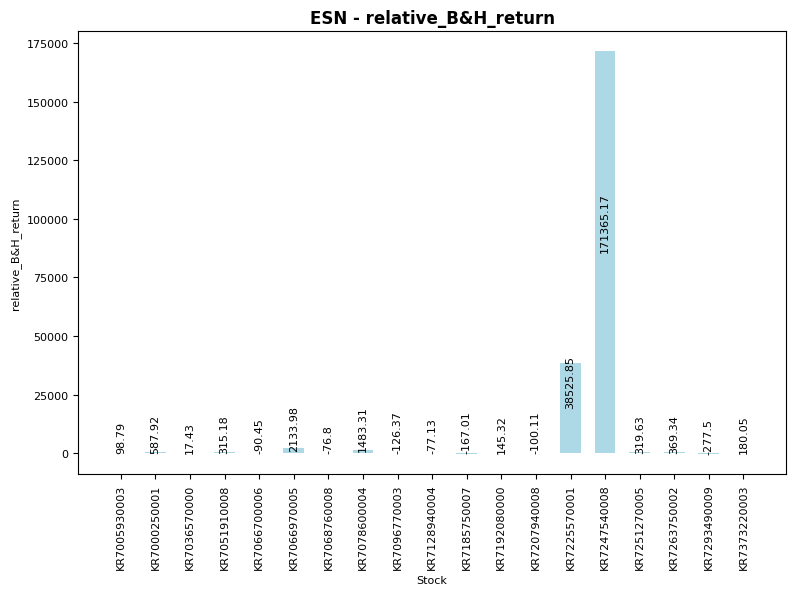

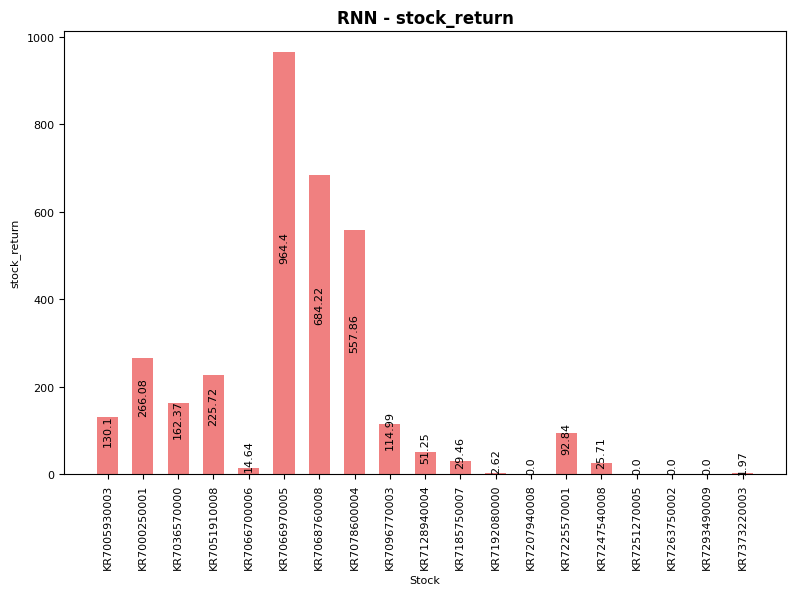

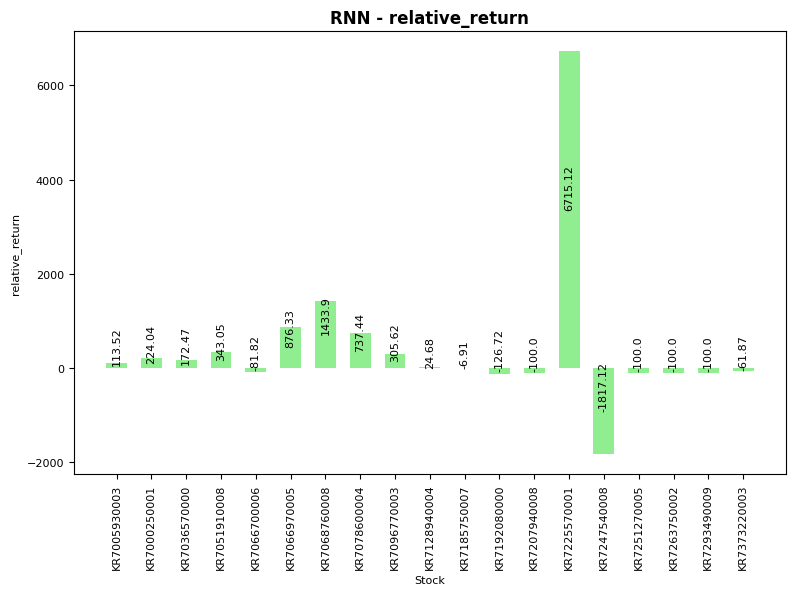

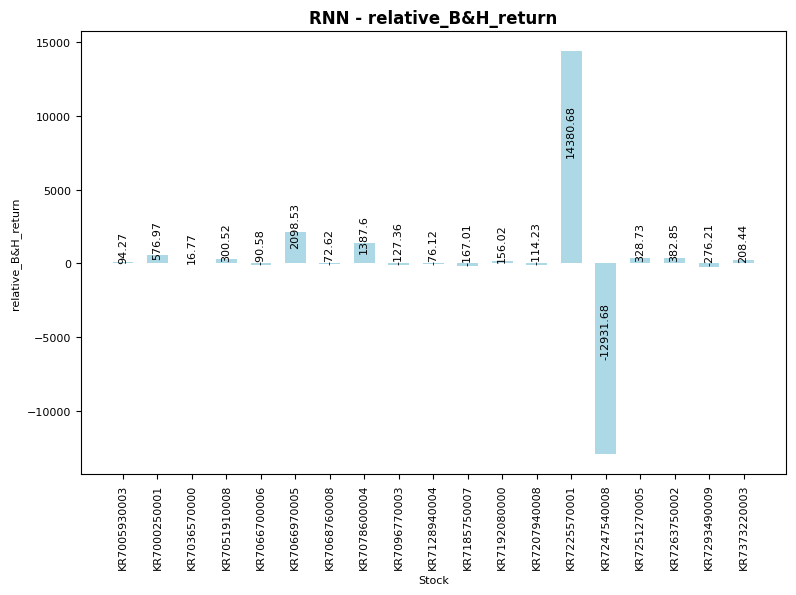

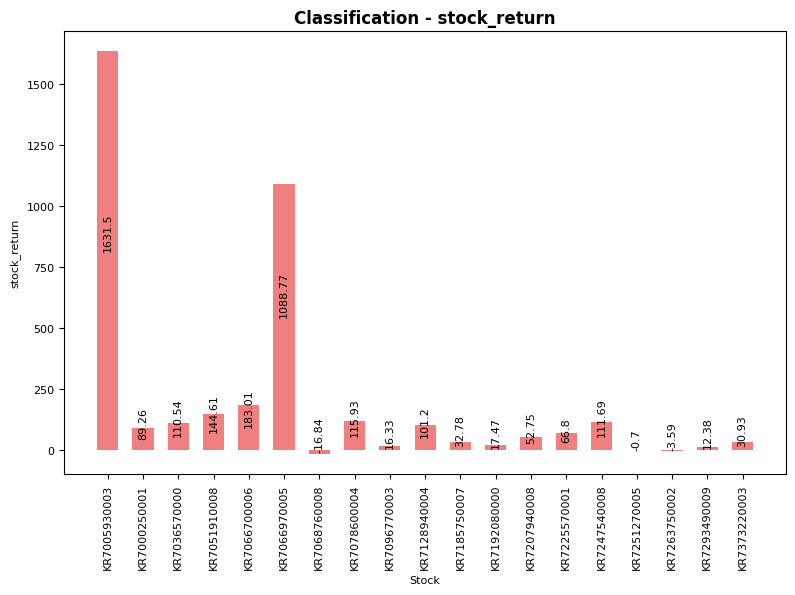

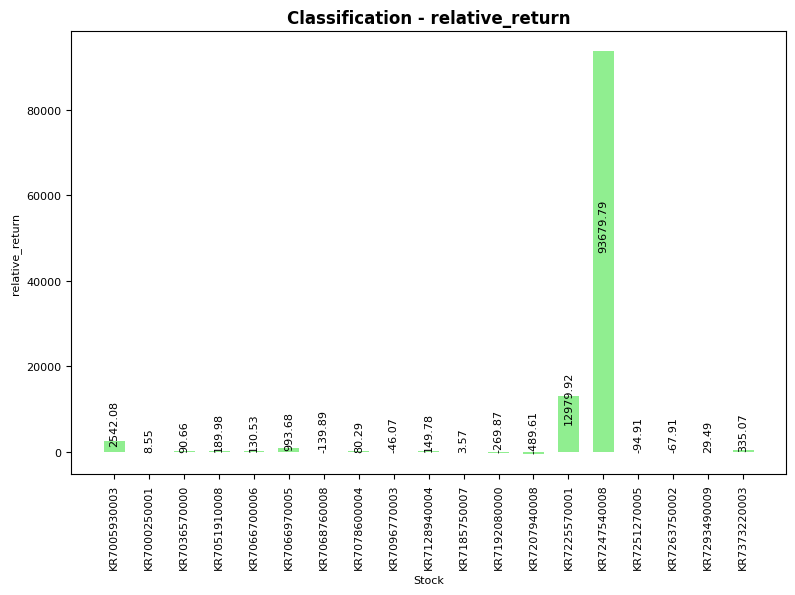

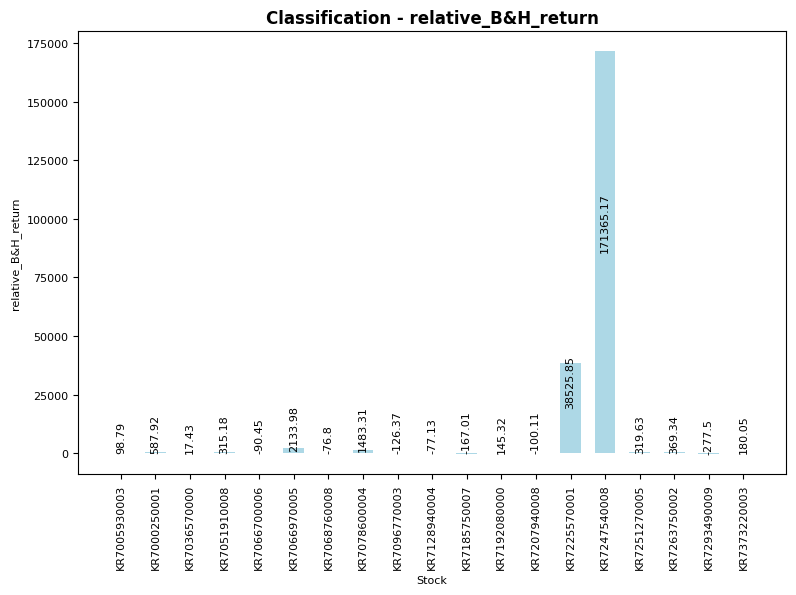

In [247]:
import matplotlib.pyplot as plt

# 데이터프레임과 열 지정
dataframes = [ESN_rel1, RNN_rel1, Cls_rel1]
columns = ['stock_return', 'relative_return', 'relative_B&H_return']
titles = ['ESN', 'RNN', 'Classification']
colors = ['lightcoral', 'lightgreen', 'lightblue']

# 각 데이터프레임에 대해 그래프를 개별 창에 출력
for i, df in enumerate(dataframes):
    plt.rcParams.update({'font.size': 8})
    for j, col in enumerate(columns):
        plt.figure(figsize=(8, 6))  # 개별 창 크기 조정
        bars = plt.bar(df['Stock'], df[col], color=colors[j], width=0.6)  # 막대 너비 조정
        plt.title(f'{titles[i]} - {col}', fontweight='bold', fontsize=12)  # 타이틀 굵기와 크기 조정
        plt.xlabel('Stock')
        plt.ylabel(col)
        plt.xticks(rotation=90)  # x축 레이블 회전

        # 각 막대 안쪽에 값을 표시 (90도 회전, 바의 높이에 따라 위치 조정)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.5 * yval, round(yval, 2), ha='center', va='bottom', rotation=90)  # 바 안쪽에 숫자 표시

        plt.tight_layout()
        plt.show()


In [233]:
display(Cls_rel1)

,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,model_type,relative_return,diff_return,buy&hold return,relative_B&H_return,Highest_return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,1631.500385,GBT,2542.078876,910.578491,122.756148,98.793349,"(relative, 2542.0788760872847)"
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,89.262823,NaiveBayes,8.553263,-80.709560,565.672577,587.919135,"(buy&hold, 587.9191346493321)"
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,110.540721,SVM,90.655866,-19.884855,68.085698,17.431275,"(relative, 90.65586561763068)"
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,144.614521,GBT,189.976427,45.361906,207.055048,315.180180,"(buy&hold, 315.1801799619929)"
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,183.014166,DecisionTree,130.529579,-52.484588,7.583950,-90.447052,"(relative, 130.52957860795183)"
5,KR7066970005,2017-03-22,2023-05-12,kosdaq,2242.0,99.550946,1088.769971,GBT,993.681190,-95.088781,2223.951340,2133.983131,"(buy&hold, 2133.9831308312596)"
6,KR7068760008,2018-03-06,2023-05-12,kosdaq,1893.0,42.225350,-16.841802,SVM,-139.885523,-123.043722,9.794645,-76.803874,"(buy&hold, -76.80387365205004)"
7,KR7078600004,2017-10-27,2023-05-12,kosdaq,2023.0,64.303667,115.934507,SVM,80.292217,-35.642289,1018.126948,1483.310873,"(buy&hold, 1483.3108733252934)"
8,KR7096770003,2018-08-13,2023-05-12,kospi,1733.0,30.289265,16.334042,RandomForest,-46.073166,-62.407208,-7.988470,-126.373931,"(relative, -46.073165629448845)"
9,KR7128940004,2019-07-16,2023-05-12,kospi,1396.0,40.518039,101.204250,SVM,149.775785,48.571535,9.265787,-77.131700,"(relative, 149.77578491313622)"


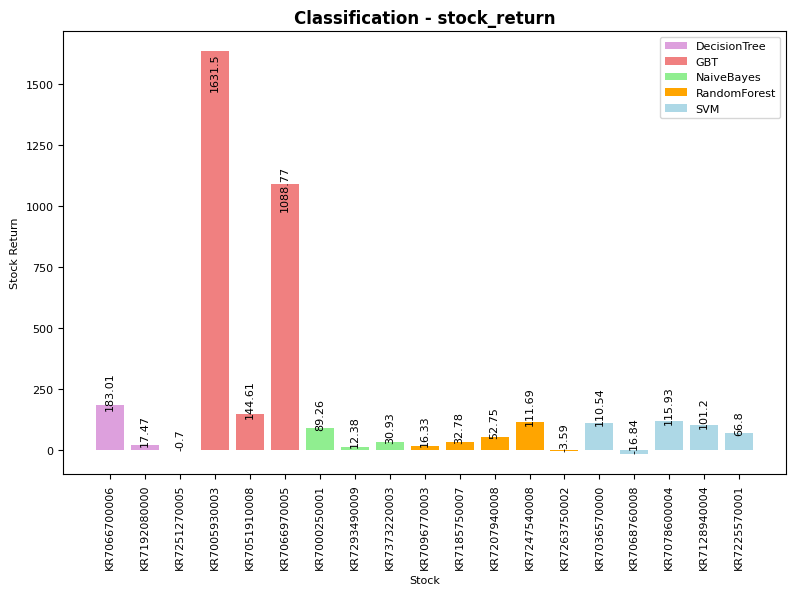

In [252]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(8, 6))

# model_type에 따른 색상 설정
colors = {'GBT': 'lightcoral', 'NaiveBayes': 'lightgreen', 'SVM': 'lightblue', 'DecisionTree': 'plum', 'RandomForest': 'orange'}

# 각 모델 유형에 따라 바 그래프 그리기
for model_type, group in df.groupby('model_type'):
    bars = plt.bar(group['Stock'], group['stock_return'], label=model_type, color=colors[model_type])

    # 각 막대 위에 값을 표시 (막대의 높이에 따라 다르게 위치 조정)
    for idx, bar in enumerate(bars):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.1 * yval, round(yval, 2),
                 ha='center', va='bottom', rotation=90)  # 바 안쪽에 숫자 표시

# 그래프 세부 설정

plt.xlabel('Stock')
plt.ylabel('Stock Return')
plt.title('Classification - stock_return', fontweight='bold', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
